In [446]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [447]:
data_b_NO2=pd.read_excel("/content/O3_Data.xlsx",sheet_name='Liverpool')

In [448]:
check=pd.read_excel("/content/checkO3.xlsx")

In [449]:
check.head()

,Annual_Mean,Band
0,1,Low
1,2,Low
2,3,Low
3,4,Low
4,5,Low


In [450]:
df_b_NO2=data_b_NO2.groupby('Year').agg(O3_Liverpool=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,O3_Liverpool
0,2000,38.0
1,2001,36.0
2,2002,43.0
3,2003,39.0
4,2004,48.0


In [451]:
year=df_b_NO2['Year']
y_test=df_b_NO2['O3_Liverpool']

In [452]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [453]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [454]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [455]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [456]:
svm_classifier = SVC(kernel='linear', C=2.0)

In [457]:
svm_classifier.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [458]:
y_pred = svm_classifier.predict(X_test)

In [459]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [460]:
df_b_NO2

,Year,O3_Liverpool
0,2000,38.0
1,2001,36.0
2,2002,43.0
3,2003,39.0
4,2004,48.0
5,2005,47.0
6,2006,48.0
7,2007,44.0
8,2008,47.0
9,2009,41.0


In [461]:
classified_df=pd.DataFrame()

In [462]:
classifed_df=df_b_NO2[['Year','O3_Liverpool']]

In [463]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [464]:
classifed_df

,Year,O3_Liverpool,Checkpoints
0,2000,38.0,Low
1,2001,36.0,Low
2,2002,43.0,Low
3,2003,39.0,Low
4,2004,48.0,Low
5,2005,47.0,Low
6,2006,48.0,Low
7,2007,44.0,Low
8,2008,47.0,Low
9,2009,41.0,Low


<ipython-input-465-ed46afcf2ec2>:10: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='Year', y='O3_Liverpool', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])


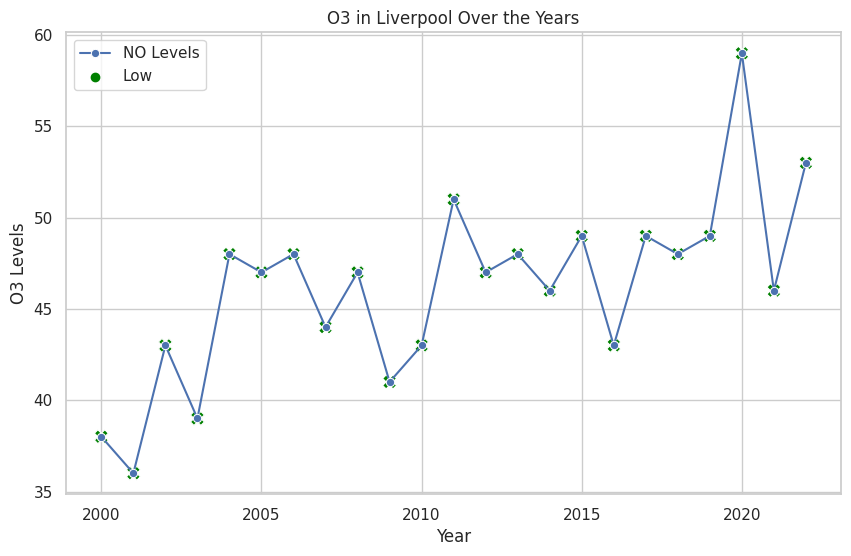

In [465]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='O3_Liverpool', data=classifed_df, marker='o', label='NO Levels')
sns.scatterplot(x='Year', y='O3_Liverpool', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])
plt.xlabel('Year')
plt.ylabel('O3 Levels')
plt.title('O3 in Liverpool Over the Years')
plt.legend()
plt.show()


In [466]:
from google.colab import files

In [467]:
csv_file_path = '/content/classified_Liverpool_O3.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [468]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>